<a href="https://colab.research.google.com/github/tryfasting/deeplearning-pytorch-textbook/blob/main/09-05%20%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84%20%EC%9C%84%ED%95%9C%20%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자연어 처리의 일반적인 과정, 토큰화, 단어 집합 생성, 정수 인코딩, 패딩, 벡터화의 과정을 이해해본다.

### 1. 토큰화(tokenization)

주어진 텍스트를 단어 또는 문자 단위로 자르는 것을 말한다.

In [1]:
en_text = 'A Dog Run back corner near spare bedrooms'

#### 1) spaCy 사용하기

In [2]:
import spacy
spacy_en = spacy.load('en_core_web_sm')

In [3]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [4]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


#### 2) NLTK 사용하기

In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


#### 3) 띄어쓰기로 토큰화

In [8]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


#### 4) 한국어 띄어쓰기 토큰화

In [9]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [10]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


#### 5) 형태소 토큰화

위의 토큰화는 조사가 붙어버리니 같은 '사과'를 다른 단어로 인식하게 될 수 있다. 한국어는 이와 같은 이유로 보통 '형태소 분석기'로 토큰화한다. 여기서는 mecab을 사용해보자.

In [11]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 1.5 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=c46f1341d9fa8b756a127fb996317120f5b992393d8a7290c91b92e502ab84eb
  Stored in directory: /root/.cache/pip/wheels/a0/56/2c/eac72592ca2e80bdc46ff47d1fb327629e2a24e8cdc5aaf95f
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1308k      0  0:00:01  0:00:01 --:--:-- 2272k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/examp

In [12]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


앞선 예와 다르게 조사가 전부 분리됐다.

#### 6) 문자 토큰화

In [13]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


### 2. 단어 집합(Vocabulary) 생성

단어 집합(vocabulary)란 중복을 제거한 텍스트의 총 단어 집합(set)을 의미한다. 실습을 위해 github의 '네이버 영화 리뷰 분류하기' 데이터를 사용해보자.

In [14]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [15]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [16]:
print(f'전체 샘플의 수 : {len(data)}')

전체 샘플의 수 : 200000


In [17]:
sample_data = data[:100] # 임의로 100개만 저장

정규 표현식을 사용해 데이터를 정제한다.

In [18]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

<ipython-input-18-1f2797fd355e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


토큰화를 수행해보자. 토큰화 과정에서 불용어를 제거하기 위해 불용어를 우선 정의한다.

In [19]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

형태소 분석기는 mecab을 사용한다.

In [20]:
tokenizer = Mecab()
tokenized = []
for sentence in sample_data['document']:
  temp = tokenizer.morphs(sentence)
  temp = [word for word in temp if not word in stopwords] # 불용어 제거
  tokenized.append(temp)

In [21]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


단어 집합을 만들어보자. NLTK는 빈도수 계산 도구인 FreqDist()를 지원한다.

In [22]:
vocab = FreqDist(np.hstack(tokenized))
print(f'단어 집합의 크기 : {len(vocab)}')

단어 집합의 크기 : 664


단어를 키(key)로, 단어에 대한 빈도수가 값(value)로 저장되어 있다. vocab에 단어를 입력하면 빈도수를 리턴한다.

In [23]:
vocab['재밌']

10

'재밌'이란 단어가 총 10번 등장하였다.

 most_common()는 상위 빈도수를 가진 주어진 수의 단어만을 리턴한다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼만 얻을 수 있다. 등장 빈도수 상위 500개의 단어만 단어집합으로 저장해보자.

In [24]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print(f'단어 집합의 크기 : {len(vocab)}')

단어 집합의 크기 : 500


In [25]:
vocab

[(np.str_('다'), 46),
 (np.str_('영화'), 31),
 (np.str_('고'), 27),
 (np.str_('을'), 25),
 (np.str_('하'), 21),
 (np.str_('있'), 17),
 (np.str_('게'), 17),
 (np.str_('보'), 15),
 (np.str_('없'), 13),
 (np.str_('최고'), 13),
 (np.str_('좋'), 13),
 (np.str_('는데'), 12),
 (np.str_('수'), 11),
 (np.str_('봤'), 11),
 (np.str_('재밌'), 10),
 (np.str_('같'), 10),
 (np.str_('적'), 10),
 (np.str_('할'), 10),
 (np.str_('었'), 10),
 (np.str_('내'), 9),
 (np.str_('만'), 9),
 (np.str_('정말'), 9),
 (np.str_('해'), 8),
 (np.str_('음'), 8),
 (np.str_('였'), 8),
 (np.str_('때'), 7),
 (np.str_('어요'), 7),
 (np.str_('ㅋㅋ'), 7),
 (np.str_('에서'), 7),
 (np.str_('까지'), 7),
 (np.str_('것'), 7),
 (np.str_('진짜'), 7),
 (np.str_('했'), 7),
 (np.str_('지'), 7),
 (np.str_('본'), 7),
 (np.str_('감동'), 7),
 (np.str_('로'), 7),
 (np.str_('아'), 7),
 (np.str_('네요'), 7),
 (np.str_('너무'), 7),
 (np.str_('다시'), 6),
 (np.str_('그'), 6),
 (np.str_('사람'), 6),
 (np.str_('연기'), 6),
 (np.str_('생각'), 6),
 (np.str_('싶'), 6),
 (np.str_('나'), 6),
 (np.str_('으면'), 6),
 (n

단어 집합의 크기가 500으로 줄어든 것을 확인할 수 있다.

### 3. 각 단어에 고유한 정수 부여

인덱스 0,1은 다른 용도로 남겨두고 나머지 단어들을 2부터 501까지 순차적으로 인덱스를 부여해보자.

In [26]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [27]:
word_to_index

{np.str_('다'): 2,
 np.str_('영화'): 3,
 np.str_('고'): 4,
 np.str_('을'): 5,
 np.str_('하'): 6,
 np.str_('있'): 7,
 np.str_('게'): 8,
 np.str_('보'): 9,
 np.str_('없'): 10,
 np.str_('최고'): 11,
 np.str_('좋'): 12,
 np.str_('는데'): 13,
 np.str_('수'): 14,
 np.str_('봤'): 15,
 np.str_('재밌'): 16,
 np.str_('같'): 17,
 np.str_('적'): 18,
 np.str_('할'): 19,
 np.str_('었'): 20,
 np.str_('내'): 21,
 np.str_('만'): 22,
 np.str_('정말'): 23,
 np.str_('해'): 24,
 np.str_('음'): 25,
 np.str_('였'): 26,
 np.str_('때'): 27,
 np.str_('어요'): 28,
 np.str_('ㅋㅋ'): 29,
 np.str_('에서'): 30,
 np.str_('까지'): 31,
 np.str_('것'): 32,
 np.str_('진짜'): 33,
 np.str_('했'): 34,
 np.str_('지'): 35,
 np.str_('본'): 36,
 np.str_('감동'): 37,
 np.str_('로'): 38,
 np.str_('아'): 39,
 np.str_('네요'): 40,
 np.str_('너무'): 41,
 np.str_('다시'): 42,
 np.str_('그'): 43,
 np.str_('사람'): 44,
 np.str_('연기'): 45,
 np.str_('생각'): 46,
 np.str_('싶'): 47,
 np.str_('나'): 48,
 np.str_('으면'): 49,
 np.str_('지금'): 50,
 np.str_('사실'): 51,
 np.str_('저'): 52,
 np.str_('부터'): 53,

이제 기존의 훈련 데이터에서 각 단어를 고유한 정수로 부여하는 작업을 해보자

In [28]:
encoded = []
for line in tokenized: # 입력 데이터에서 1줄씩 문장을 읽음
  temp = []
  for w in line: # 각 줄에서 1개씩 글자를 읽음
    try:
      temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
    except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
      temp.append(word_to_index['unk']) # unk의 인덱스로 변환
  encoded.append(temp)

In [29]:
print(encoded[:10])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [45, 33, 119, 210, 211, 212, 213, 69, 46, 34, 13, 214, 120, 15, 2, 215, 70, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [121, 5, 24, 36, 44, 122, 123, 53, 117, 31, 85, 5, 14, 7, 3], [124, 37, 221, 42, 80, 37], [119, 222, 55, 223, 55, 86, 224, 38, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


### 4. 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

자연어처리에서 패딩은, 다음과 같다.  
정해진 길이로 모든 샘플들의 길이를 맞춰주되, 길이가 정해준 길이보다 짧은 샘플들은 'pad' 토큰을 추가하여 길이를 맞춰주는 작업이다.

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


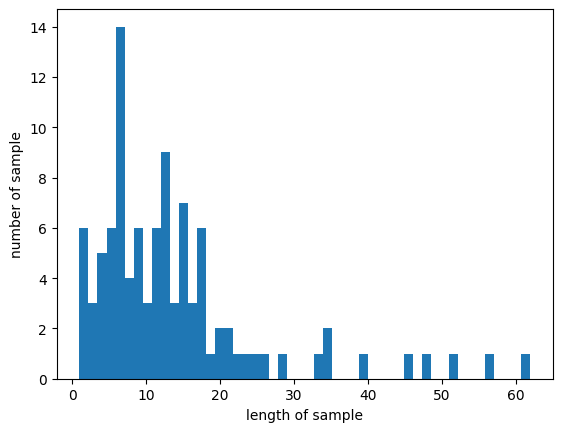

In [30]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [31]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해진 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [32]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))


리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [33]:
print(encoded[:4])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [45, 33, 119, 210, 211, 212, 213, 69, 46, 34, 13, 214, 120, 15, 2, 215, 70, 8, 33, 3, 35, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
